(a) Compute a normalized 5×5 Gaussian kernel (σ = 2) using NumPy

In [1]:
import numpy as np

def gaussian_kernel(size, sigma):
    k = size // 2
    kernel = np.zeros((size, size), dtype=np.float32)

    for i in range(-k, k+1):
        for j in range(-k, k+1):
            kernel[i+k, j+k] = np.exp(-(i**2 + j**2) / (2 * sigma**2))

    # Normalize kernel
    kernel /= np.sum(kernel)
    return kernel

kernel_5x5 = gaussian_kernel(5, sigma=2)

print("5x5 Gaussian Kernel (σ=2):")
print(kernel_5x5)
print("Sum of kernel:", kernel_5x5.sum())


5x5 Gaussian Kernel (σ=2):
[[0.02324684 0.03382396 0.03832756 0.03382396 0.02324684]
 [0.03382396 0.04921356 0.05576627 0.04921356 0.03382396]
 [0.03832756 0.05576627 0.06319147 0.05576627 0.03832756]
 [0.03382396 0.04921356 0.05576627 0.04921356 0.03382396]
 [0.02324684 0.03382396 0.03832756 0.03382396 0.02324684]]
Sum of kernel: 1.0


(b) Visualize a 51×51 Gaussian kernel as a 3D surface plot

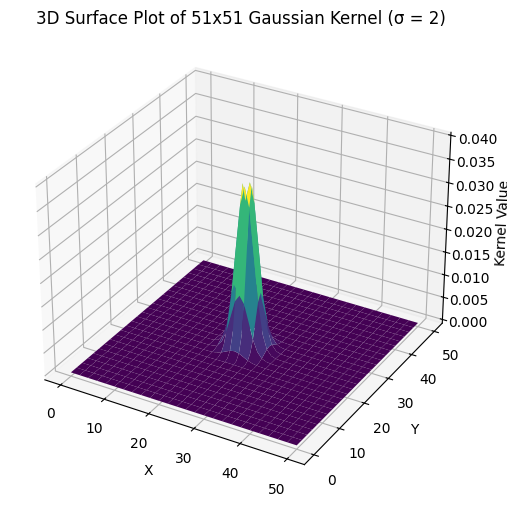

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

kernel_51x51 = gaussian_kernel(51, sigma=2)

x = np.arange(51)
y = np.arange(51)
X, Y = np.meshgrid(x, y)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, kernel_51x51, cmap='viridis')

ax.set_title("3D Surface Plot of 51x51 Gaussian Kernel (σ = 2)")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Kernel Value")

plt.show()


(c) Apply Gaussian smoothing using the manually computed kernel

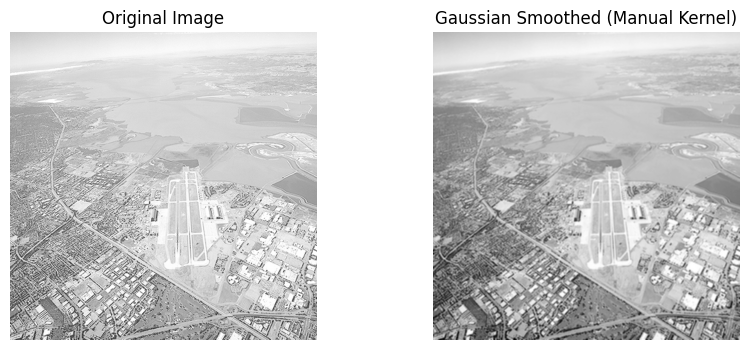

In [3]:
import cv2
import matplotlib.pyplot as plt
import os

# Load grayscale image
image_path = "../data/original/runway.png"
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if img is None:
    raise FileNotFoundError("Image not found")

# Apply manual Gaussian filtering
smoothed_manual = cv2.filter2D(img, -1, kernel_5x5)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(smoothed_manual, cmap='gray')
plt.title("Gaussian Smoothed (Manual Kernel)")
plt.axis("off")

plt.show()


(d) Apply Gaussian smoothing using OpenCV’s GaussianBlur()

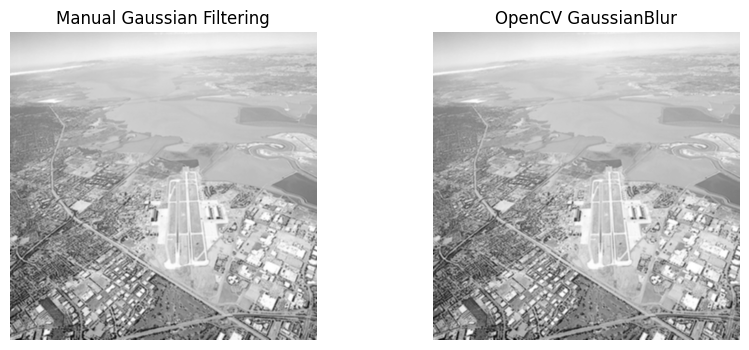

In [4]:
smoothed_opencv = cv2.GaussianBlur(img, (5,5), sigmaX=2)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(smoothed_manual, cmap='gray')
plt.title("Manual Gaussian Filtering")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(smoothed_opencv, cmap='gray')
plt.title("OpenCV GaussianBlur")
plt.axis("off")

plt.show()
